# Exercise Plan Recommendations

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv("Excersice_data_set.csv")
df

,Age,Gender,BMI,workout_plan
0,22,Female,21.5,E1.0
1,23,Male,34.8,E3.2
2,24,Male,26.4,E2.4
3,25,Female,27.5,E3.0
4,26,Female,30.3,E3.2
...,...,...,...,...
509,60,Female,29.3,E3.2
510,60,Female,29.5,E3.2
511,60,Female,30.2,E3.2
512,60,Female,30.2,E3.2


# Data Pre-processing  

In [90]:
le = LabelEncoder()
data = df 

data["Gender"] = le.fit_transform(df["Gender"])
   
data.head(50)
le1 = LabelEncoder()
le1.fit(df["workout_plan"] )
data["workout_plan"] = le1.transform(df["workout_plan"] )
data["workout_plan_le"] = le1.inverse_transform(df["workout_plan"])
data.head(10)

,Age,Gender,BMI,workout_plan,workout_plan_le
0,22,0,21.5,0,E1.0
1,23,1,34.8,12,E3.2
2,24,1,26.4,9,E2.4
3,25,0,27.5,10,E3.0
4,26,0,30.3,12,E3.2
5,27,1,34.8,12,E3.2
6,28,0,21.9,1,E1.1
7,28,0,24.8,6,E2.1
8,29,0,24.7,6,E2.1
9,29,0,24.7,6,E2.1


In [91]:
df.isna().sum().sort_values()

Age                0
Gender             0
BMI                0
workout_plan       0
workout_plan_le    0
dtype: int64

In [92]:
tmp_one = data[["workout_plan","workout_plan_le"]]
tmp_two = tmp_one.drop_duplicates(subset = None)
tmp_dic = tmp_two.to_dict("records")
tmp_dic

[{'workout_plan': 0, 'workout_plan_le': 'E1.0'},
 {'workout_plan': 12, 'workout_plan_le': 'E3.2'},
 {'workout_plan': 9, 'workout_plan_le': 'E2.4'},
 {'workout_plan': 10, 'workout_plan_le': 'E3.0'},
 {'workout_plan': 1, 'workout_plan_le': 'E1.1'},
 {'workout_plan': 6, 'workout_plan_le': 'E2.1'},
 {'workout_plan': 14, 'workout_plan_le': 'E3.4'},
 {'workout_plan': 4, 'workout_plan_le': 'E1.4'},
 {'workout_plan': 8, 'workout_plan_le': 'E2.3'},
 {'workout_plan': 11, 'workout_plan_le': 'E3.1'},
 {'workout_plan': 13, 'workout_plan_le': 'E3.3'},
 {'workout_plan': 3, 'workout_plan_le': 'E1.3'},
 {'workout_plan': 2, 'workout_plan_le': 'E1.2'},
 {'workout_plan': 7, 'workout_plan_le': 'E2.2'},
 {'workout_plan': 5, 'workout_plan_le': 'E2.0'}]

## Exploratory data analysis

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


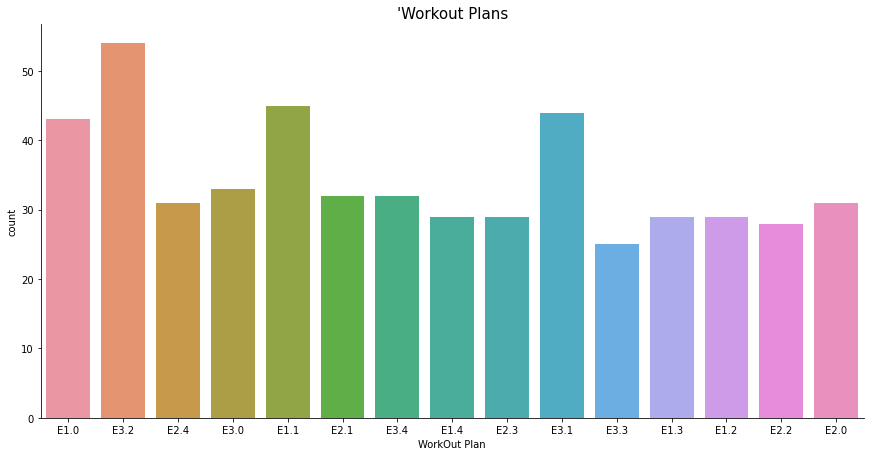

In [93]:
sns.factorplot(data=data, x=data["workout_plan_le"], kind= 'count',size=6,aspect=2)
plt.xlabel('WorkOut Plan')
plt.title("'Workout Plans",fontsize=15)
plt.show()

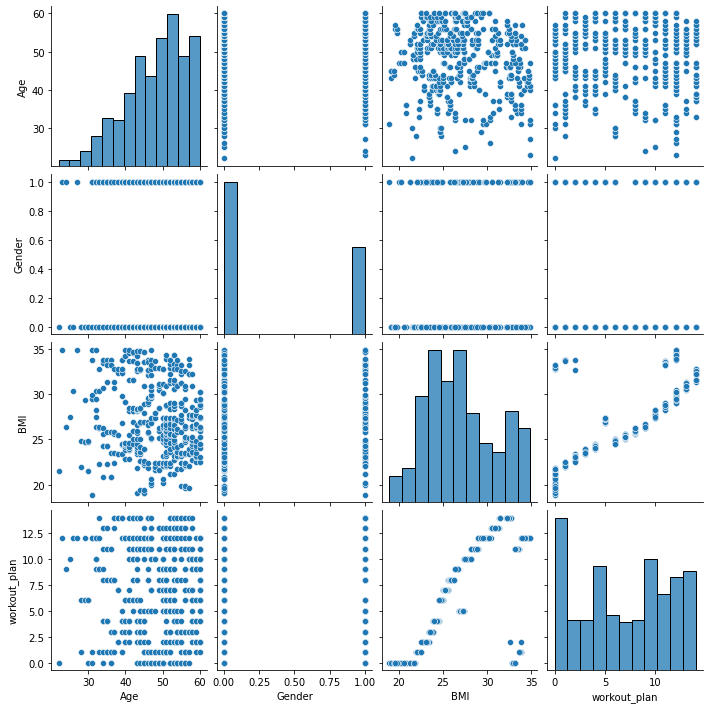

In [94]:
sns.pairplot(df)

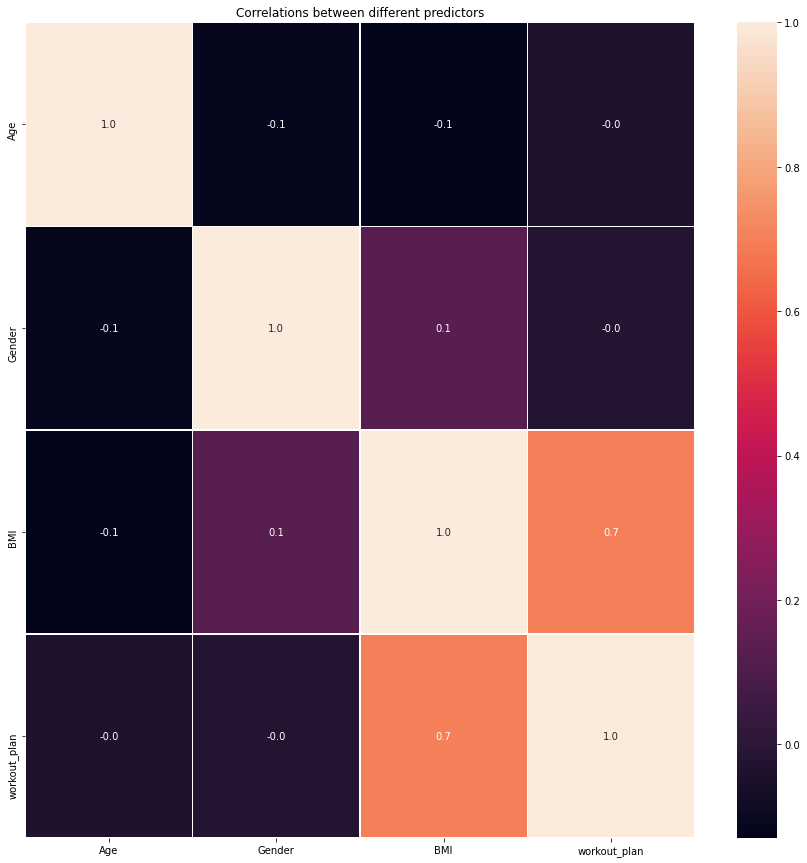

In [95]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

In [79]:
X = df[[ 'Age', 'Gender', 'BMI']].values
X

array([[22. ,  0. , 21.5],
       [23. ,  1. , 34.8],
       [24. ,  1. , 26.4],
       ...,
       [60. ,  0. , 30.2],
       [60. ,  0. , 30.2],
       [60. ,  0. , 30.2]])

In [80]:
y = data['workout_plan'].values
y

array([ 0, 12,  9, 10, 12, 12,  1,  6,  6,  6, 12,  0,  6,  6,  0, 12, 12,
       12,  1,  9, 10, 10, 12, 12, 12,  1,  9,  9, 12, 14,  0,  4,  4,  8,
        9, 11, 13,  1,  1,  1,  4,  4,  4,  8, 11, 13,  0,  0,  1,  1,  3,
        8,  8,  8, 11, 11,  1,  3,  8,  8, 13, 14, 14,  2,  2,  7,  7, 14,
       14,  1,  1,  3,  4,  4,  4,  5, 12, 14, 14, 14, 14,  2,  2,  3,  4,
        4,  6,  6,  6, 12, 12, 12, 12, 12,  2,  3,  3,  4,  4,  6,  7, 10,
       11, 11, 12, 12, 14,  5,  6,  6,  8,  8, 10, 10, 10, 11, 11, 12, 12,
       14, 14,  0,  0,  2,  3,  4,  4,  6,  6,  6,  8,  8,  9, 10, 10, 11,
       11, 11, 11, 11, 11, 12, 12, 14, 14,  0,  2,  2,  2,  3,  3,  3,  4,
        4,  5,  5,  6, 11, 11, 12, 14, 14,  0,  0,  0,  1,  1,  1,  1,  2,
        3,  4,  4,  5, 10, 11, 11, 11, 12, 12, 13,  0,  1,  1,  1,  5,  5,
        8,  8,  9, 11, 11, 12, 12, 14, 14, 14,  2,  0,  0,  0,  0,  1,  5,
        5,  7,  7,  7, 10, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14,  0,
        0,  1,  1,  1,  1

##  Splitting into Test and training data

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

## Model selection 

In [97]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision tree classifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'random_state': [10,20,30]
        }
    }

}

In [98]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,svm,0.389206,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.573939,{'n_estimators': 10}
2,logistic_regression,0.196402,{'C': 10}
3,decision tree classifier,0.875462,{'random_state': 10}


In [99]:
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print('Decision Tree Classifier Train Score is : ' , clf.score(X_train, y_train))
print('Decision Tree Classifier Test Score is : ' , clf.score(X_test, y_test))

Decision Tree Classifier Train Score is :  0.9927007299270073
Decision Tree Classifier Test Score is :  0.9029126213592233


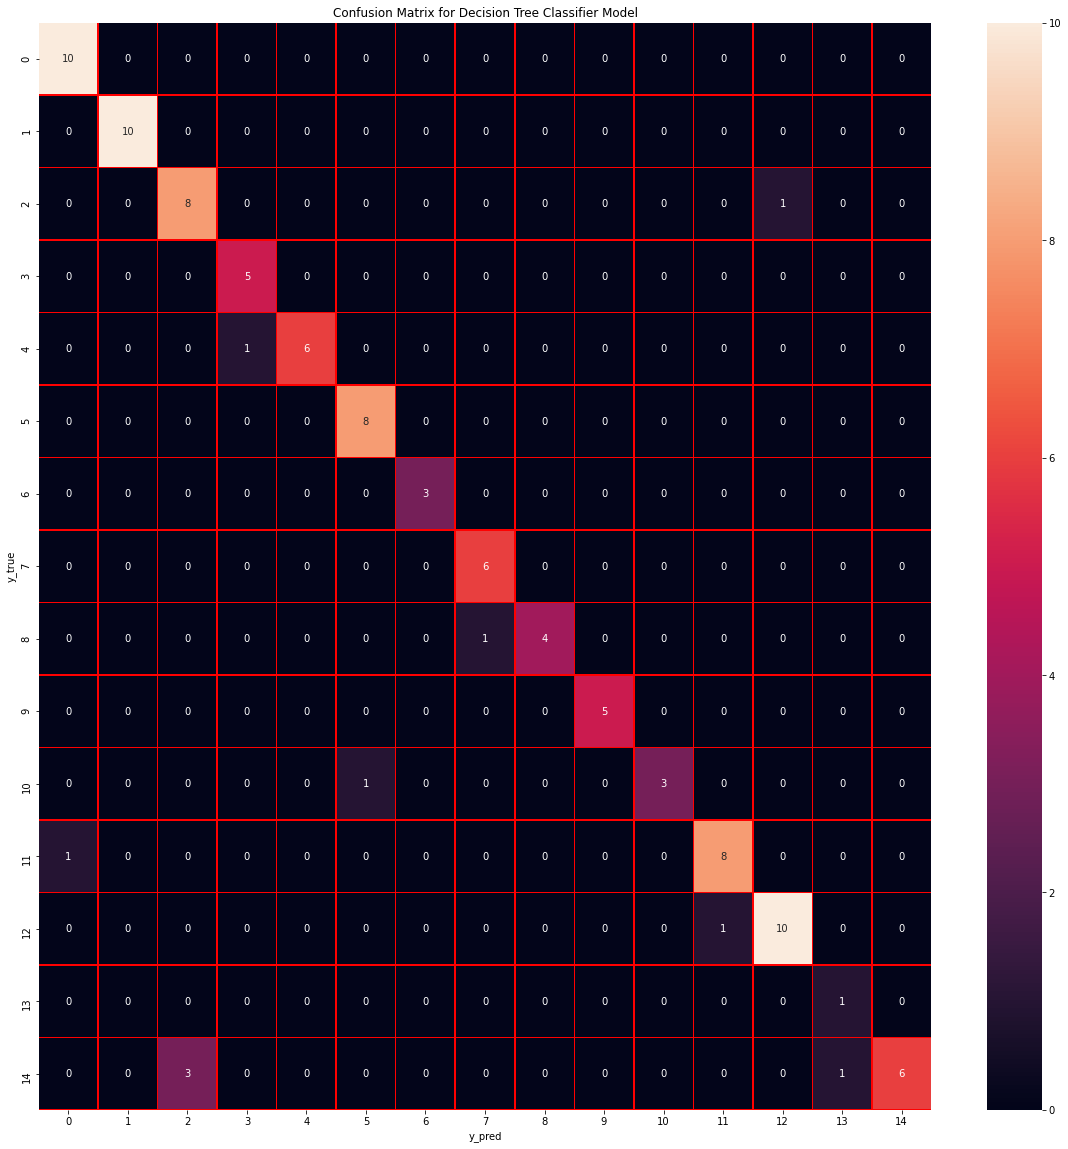

In [100]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix for Decision Tree Classifier Model")
plt.show()

In [85]:
import joblib
joblib.dump(clf, 'model_workout_plan')

['model_workout_plan']

In [86]:
model = joblib.load('model_workout_plan')
model.predict([[ 15. ,   0. ,  10.2]])
model.predict(X_test)

array([ 7,  9, 13, 14, 10, 11, 14,  3, 12, 10,  4,  1,  6, 12, 11,  6,  0,
        0, 13,  8,  5,  0,  1,  2,  5, 12, 13,  0,  1,  1, 14,  7,  6, 14,
        1,  0,  8, 14, 10,  2, 14,  9,  4,  3,  7, 13,  9,  1, 13,  5, 11,
        0,  5,  1,  0, 12,  1,  2, 13, 12,  5,  2,  6,  2, 14, 12,  2, 11,
        1,  6,  0,  4,  5,  2, 11,  8, 10, 10,  2,  4, 12, 11, 10,  2,  6,
        1,  1, 12, 12, 10, 12, 11,  4, 10,  5,  7,  7,  9,  9, 11,  6,  0,
       11])

In [90]:
list

[]